In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use("seaborn")
import seaborn as sns
sns.set_style("dark")
sns.set_palette(sns.color_palette("BuGn_r"))
import statsmodels.api as sm
from CRUDE_OIL_COUNTRIES import TOP_OIL_PRODUCERS, TOP_OIL_CONSUMERS

In [2]:
source_file = "../data/ravenpack/dj_global_macro_20000101_20191031_ess.csv"

In [3]:
with open(source_file, "r", encoding="ISO-8859-1") as file:
    df = pd.read_csv(file, header=0)

In [4]:
print(df.columns)

Index(['TIMESTAMP_UTC', 'RPNA_DATE_UTC', 'RPNA_TIME_UTC', 'RP_ENTITY_ID',
       'ENTITY_TYPE', 'ENTITY_NAME', 'POSITION_NAME', 'RP_POSITION_ID',
       'COUNTRY_CODE', 'RELEVANCE', 'TOPIC', 'GROUP', 'TYPE', 'SUB_TYPE',
       'PROPERTY', 'EVALUATION_METHOD', 'MATURITY', 'CATEGORY', 'ESS', 'AES',
       'AEV', 'ENS', 'ENS_SIMILARITY_GAP', 'ENS_KEY', 'ENS_ELAPSED', 'G_ENS',
       'G_ENS_SIMILARITY_GAP', 'G_ENS_KEY', 'G_ENS_ELAPSED',
       'EVENT_SIMILARITY_KEY', 'NEWS_TYPE', 'SOURCE', 'RP_STORY_ID',
       'RP_STORY_EVENT_INDEX', 'RP_STORY_EVENT_COUNT', 'PRODUCT_KEY'],
      dtype='object')


In [5]:
list(TOP_OIL_PRODUCERS.values())

['US', 'SA', 'RU', 'CA', 'CN', 'IQ', 'IR', 'AE', 'BR', 'KW']

In [6]:
mask_top_producers = [c in TOP_OIL_PRODUCERS.values() for c in df.COUNTRY_CODE]
mask_top_consumers = [c in TOP_OIL_CONSUMERS.values() for c in df.COUNTRY_CODE]
print("Percentage of Information about Top Producers: {}".format(np.mean(mask_top_producers)))
print("Percentage of Information about Top Consumers: {}".format(np.mean(mask_top_consumers)))

Percentage of Information about Top Producers: 0.3319658817205001
Percentage of Information about Top Consumers: 0.42846744850169993


In [7]:
print(df.shape)
df_prod = df[mask_top_producers]
print(df_prod.shape)
df_cons = df[mask_top_consumers]
print(df_cons.shape)

(2764266, 36)
(917642, 36)
(1184398, 36)


In [13]:
# df_cons.to_csv("../data/ravenpack/oil_consumers_all.csv", index=False)
# df_prod.to_csv("../data/ravenpack/oil_producers_all.csv", index=False)

In [8]:
color = sns.cubehelix_palette(16, start=.5, rot=-.75, reverse=False)

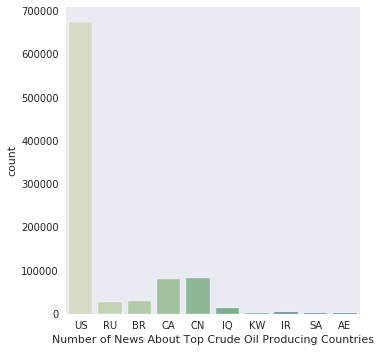

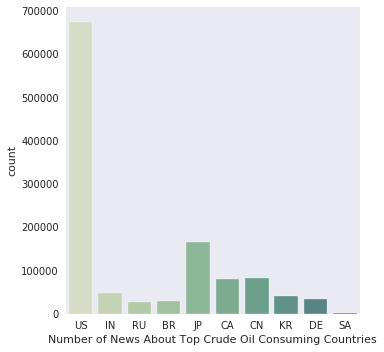

In [9]:
chart = sns.catplot(x="COUNTRY_CODE", kind="count", data=df_prod, palette=color)
chart.set_xlabels("Number of News About Top Crude Oil Producing Countries")
chart.savefig("eda_figures/crude_oil/{}.png".format("news_top_producers"))
plt.show()
chart = sns.catplot(x="COUNTRY_CODE", kind="count", data=df_cons, palette=color)
chart.set_xlabels("Number of News About Top Crude Oil Consuming Countries")
chart.savefig("eda_figures/crude_oil/{}.png".format("news_top_consumers"))
plt.show()